In [1]:
import pandas as pd
import math 
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.max_columns=None

corre=pd.read_csv(r"E:\Download\Datathon\players_team_corr.csv")

In [2]:
corre

Unnamed: 0  Unnamed: 0.1  country_id  league_id     season  stage  \
0               0           145           1          1  2008/2009     24   
1               1           153           1          1  2008/2009     25   
2               2           155           1          1  2008/2009     25   
3               3           162           1          1  2008/2009     26   
4               4           168           1          1  2008/2009     26   
...           ...           ...         ...        ...        ...    ...   
21369       21369         25972       24558      24558  2015/2016      8   
21370       21370         25974       24558      24558  2015/2016      9   
21371       21371         25975       24558      24558  2015/2016      9   
21372       21372         25976       24558      24558  2015/2016      9   
21373       21373         25978       24558      24558  2015/2016      9   

                date  match_id  home_team_id  away_team_id  home_team_goal  \
0       2/27/09 0:00    493017          8203          9987               2   
1      3/8/2009 0:00    493025          9984          8342               1   
2      3/7/2009 0:00    493027          8635         10000               2   
3       3/13/09 0:00    493034          8203          8635               2   
4       3/14/09 0:00    493040         10000          9999               0   
...              ...       ...           ...           ...             ...   
21369   9/13/15 0:00   1992089         10243         10191               3   
21370   9/22/15 0:00   1992091         10190         10191               1   
21371   9/23/15 0:00   1992092          9824         10199               1   
21372   9/23/15 0:00   1992093          9956         10179               2   
21373   9/23/15 0:00   1992095         10192          9931               4   

       away_team_goal  home_player_1  home_player_2  home_player_3  \
0                   1          38327          67950          67958   
1                   3          36835          37047          37021   
2                   0          34480          38388          26458   
3                   1          38327          67950          67958   
4                   0          37900          37886          37100   
...               ...            ...            ...            ...   
21369               3         274776         451982          34268   
21370               0          42231         678384          95220   
21371               2          33272          41621          25813   
21372               0         157856         274779         177689   
21373               3         274787         492132         108451   

       home_player_4  home_player_5  home_player_6  home_player_7  \
0              67959          37112          36393         148286   
1              37051         104386          32863          37957   
2              13423          38389          30949          38393   
3              38801          67898          37112          67959   
4              37903          37889          37893          37981   
...              ...            ...            ...            ...   
21369         197757         121080         462608          67008   
21370         638592         413155          45780         171229   
21371         257845         114735          42237         113227   
21372         294256          42258          39979         173936   
21373          25815          94553         384376         598355   

       home_player_8  home_player_9  home_player_10  home_player_11  \
0              67898         164352           38801           26502   
1              37909          38357           37065           78462   
2              38253          38383           38778           37069   
3             148286         164352           33657           26502   
4             131531         131530           38231          130027   
...              ...            ...             ...          

In [3]:
corre.drop(corre.columns[corre.columns.get_loc("Unnamed: 0"):corre.columns.get_loc("away_team_id")+1],axis=1,inplace=True)
corre.drop(corre.columns[corre.columns.get_loc("home_player_1"):corre.columns.get_loc("away_player_11")+1],axis=1,inplace=True)


In [5]:
corre["goal_diff"]=corre["home_team_goal"]-corre["away_team_goal"]
corre.drop(["home_team_goal","away_team_goal"],axis=1,inplace=True)
corre

home_overall_rating  home_potential  home_preferred_foot  \
0                59.727273       65.636364                    1   
1                65.818182       69.181818                    1   
2                70.454545       74.818182                    3   
3                59.818182       66.000000                    1   
4                62.090909       67.272727                    2   
...                    ...             ...                  ...   
21369            61.363636       66.181818                    0   
21370            61.545455       67.636364                    3   
21371            59.818182       63.636364                    1   
21372            67.727273       73.181818                    1   
21373            68.909091       73.727273                    5   

      home_attacking_work_rate home_defensive_work_rate  home_crossing  \
0                       medium                   medium      48.090909   
1                       medium                   medium      56.090909   
2                       medium                   medium      59.363636   
3                       medium                   medium      47.363636   
4                       medium                   medium      51.000000   
...                        ...                      ...            ...   
21369                   medium                   medium      48.454545   
21370                   medium                   medium      50.454545   
21371                   medium                   medium      51.818182   
21372                   medium                   medium      56.000000   
21373                   medium                   medium      56.090909   

       home_finishing  home_heading_accuracy  home_short_passing  \
0           46.454545              53.000000           54.818182   
1           55.727273              56.272727           64.818182   
2           51.000000              63.454545           67.636364   
3           47.454545              54.727273           54.000000   
4           42.727273              53.000000           56.454545   
...               ...                    ...                 ...   
21369       44.272727              53.636364           60.181818   
21370       44.272727              51.909091           56.181818   
21371       44.363636              53.090909           57.727273   
21372       49.818182              57.272727           61.909091   
21373       46.636364              56.454545           62.363636   

       home_volleys  home_dribbling  home_curve  home_free_kick_accuracy  \
0         44.100000       50.545455   45.500000                44.909091   
1         54.363636       58.000000   52.181818                53.727273   
2         50.363636       58.090909   50.636364                52.272727   
3         45.000000       49.454545   45.272727                44.090909   
4         47.545455       49.636364   48.545455                45.272727   
...             ...             ...         ...                      ...   
21369     41.272727       51.090909   47.090909                40.000000   
21370     46.000000       53.454545   47.909091                46.727273   
21371     45.727273       50.363636   50.636364                49.363636   
21372     46.909091       61.090909   58.272727                44.363636   
21373     47.818182       58.545455   51.818182                50.363636   

       home_long_passing  home_ball_control  home_acceleration  \
0              51.909091          56.272727          59.727273   
1              60.272727          60.727273          66.545455   
2              64.454545          67.000000          64.545455   
3              50.000000          55.727273          60.000000   
4              54.181818          56.000000          63.000000   
...                  ...                ...                ...   
21369          52.545455          56.000000          60.727273   
21370          50.727273          55.818182          64

In [6]:
corre.to_csv(r'E:\Download\Datathon\prediction_classification2.csv')

In [7]:
corre.drop(corre.columns[corre.columns.get_loc("home_preferred_foot"):corre.columns.get_loc("home_defensive_work_rate")+1],axis=1,inplace=True)
corre.drop(corre.columns[corre.columns.get_loc("away_preferred_foot"):corre.columns.get_loc("away_defensive_work_rate")+1],axis=1,inplace=True)

In [8]:
for i in corre.columns:
    if "away" in i:
        corre.drop(i,axis=1,inplace=True)
    if "a_" in i:
        corre.drop(i,axis=1,inplace=True)

In [9]:
corre

home_overall_rating  home_potential  home_crossing  home_finishing  \
0                59.727273       65.636364      48.090909       46.454545   
1                65.818182       69.181818      56.090909       55.727273   
2                70.454545       74.818182      59.363636       51.000000   
3                59.818182       66.000000      47.363636       47.454545   
4                62.090909       67.272727      51.000000       42.727273   
...                    ...             ...            ...             ...   
21369            61.363636       66.181818      48.454545       44.272727   
21370            61.545455       67.636364      50.454545       44.272727   
21371            59.818182       63.636364      51.818182       44.363636   
21372            67.727273       73.181818      56.000000       49.818182   
21373            68.909091       73.727273      56.090909       46.636364   

       home_heading_accuracy  home_short_passing  home_volleys  \
0                  53.000000           54.818182     44.100000   
1                  56.272727           64.818182     54.363636   
2                  63.454545           67.636364     50.363636   
3                  54.727273           54.000000     45.000000   
4                  53.000000           56.454545     47.545455   
...                      ...                 ...           ...   
21369              53.636364           60.181818     41.272727   
21370              51.909091           56.181818     46.000000   
21371              53.090909           57.727273     45.727273   
21372              57.272727           61.909091     46.909091   
21373              56.454545           62.363636     47.818182   

       home_dribbling  home_curve  home_free_kick_accuracy  home_long_passing  \
0           50.545455   45.500000                44.909091          51.909091   
1           58.000000   52.181818                53.727273          60.272727   
2           58.090909   50.636364                52.272727          64.454545   
3           49.454545   45.272727                44.090909          50.000000   
4           49.636364   48.545455                45.272727          54.181818   
...               ...         ...                      ...                ...   
21369       51.090909   47.090909                40.000000          52.545455   
21370       53.454545   47.909091                46.727273          50.727273   
21371       50.363636   50.636364                49.363636          55.636364   
21372       61.090909   58.272727                44.363636          56.090909   
21373       58.545455   51.818182                50.363636          58.272727   

       home_ball_control  home_acceleration  home_sprint_speed  home_agility  \
0              56.272727          59.727273          62.272727     60.200000   
1              60.727273          66.545455          68.000000     65.272727   
2              67.000000          64.545455          68.545455     63.727273   
3              55.727273          60.000000          62.909091     59.454545   
4              56.000000          63.000000          65.272727     65.454545   
...                  ...                ...                ...           ...   
21369          56.000000          60.727273          64.181818     58.727273   
21370          55.818182          64.000000          66.090909     63.181818   
21371          56.454545          57.363636          58.818182     60.909091   
21372          62.818182          70.090909          73.363636     64.272727   
21373          63.727273          69.000000          70.272727     70.363636   

       home_reactions  home_balance  home_shot_power  home_jumping  \
0           59.545455     69.800000        53.818182     64.000000   
1           66.090909     61.363636        65.181818     64.909091   
2           68.000000     70.090909        61.909091     66.000000   
3           60.090909     70.818182        54.636364     65.181818   
4    

In [16]:
corre.drop(["h_elo","goal_diff"],axis=1,inplace=True)

In [10]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


def heatmap(x, y, **kwargs):
    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)

    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 

    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]

    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)

    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)

    size_scale = kwargs.get('size_scale', 250)

    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}

    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot

    marker = kwargs.get('marker', 's')

    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order'
    ]}

    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num])

    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')

    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = bar_y[1] - bar_y[0]
        ax.barh(
            y=bar_y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 


def corrplot(data, size_scale=250, marker='s'):
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale
    )


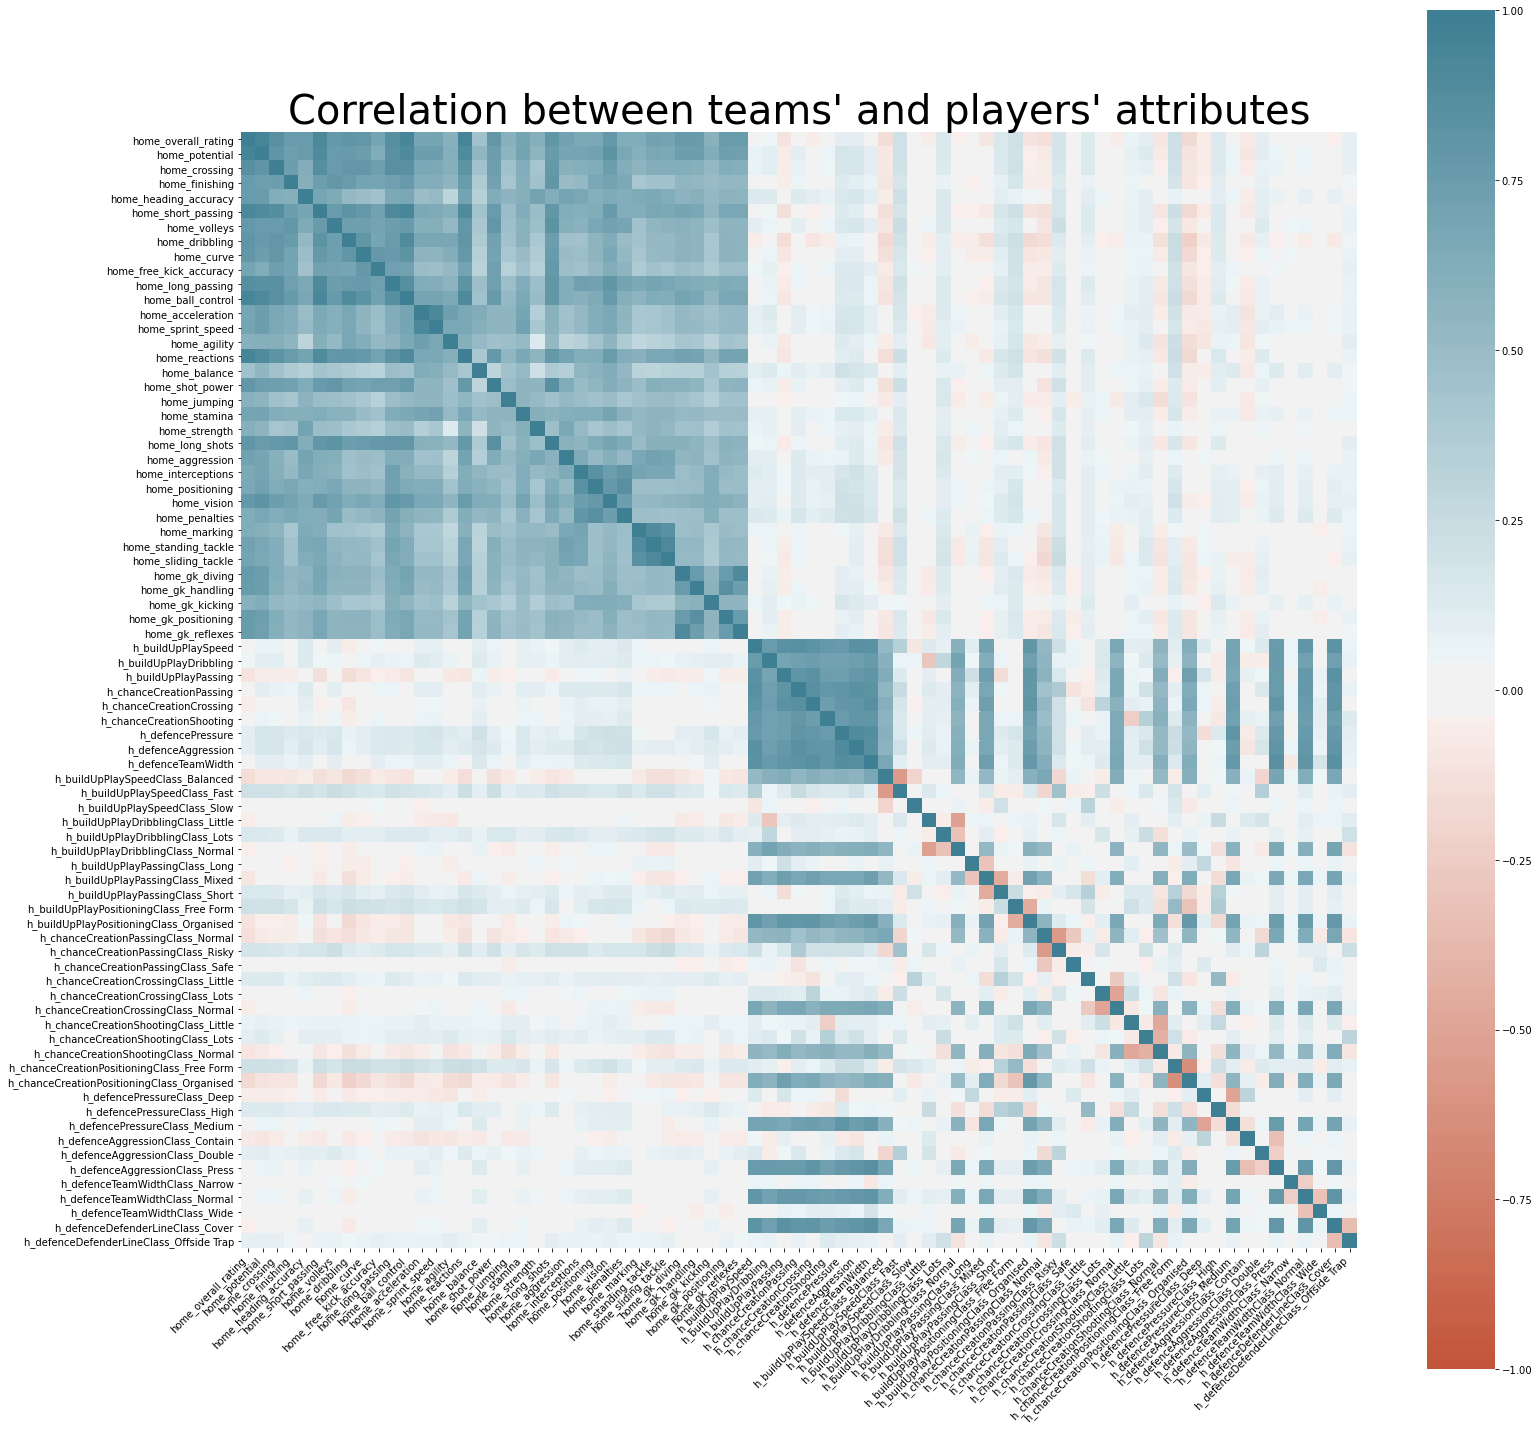

In [21]:
corr = corre.corr()
plt.figure(figsize=(25, 25))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_title("Correlation between teams' and players' attributes",fontdict={'fontsize': 40});

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
  

# Create correlation matrix
corr_mat = corre.corr(method='pearson')
  
# Convert correlation matrix to 1-D Series and sort
sorted_mat = corr_mat.unstack().sort_values()
  
print(sorted_mat)

h_chanceCreationPositioningClass_Organised  h_chanceCreationPositioningClass_Free Form   -0.625269
h_chanceCreationPositioningClass_Free Form  h_chanceCreationPositioningClass_Organised   -0.625269
h_chanceCreationPassingClass_Normal         h_chanceCreationPassingClass_Risky           -0.566843
h_chanceCreationPassingClass_Risky          h_chanceCreationPassingClass_Normal          -0.566843
h_buildUpPlaySpeedClass_Balanced            h_buildUpPlaySpeedClass_Fast                 -0.560991
                                                                                            ...   
h_buildUpPlayPositioningClass_Organised     h_buildUpPlayPositioningClass_Organised       1.000000
h_chanceCreationPassingClass_Normal         h_chanceCreationPassingClass_Normal           1.000000
h_chanceCreationPassingClass_Risky          h_chanceCreationPassingClass_Risky            1.000000
h_buildUpPlayDribblingClass_Normal          h_buildUpPlayDribblingClass_Normal            1.000000
goal_diff 

In [15]:
sorted_mat.to_csv(r'E:\Download\Datathon\correlation.csv')

PermissionError: [Errno 13] Permission denied: 'E:\\Download\\Datathon\\correlation.csv'